## Abstract

In this blog post, I look at racial employment bias in Ohio through ACS data. I do this by creating a model using an optimized descision tree. From this model, I do an audit to detect racism, although race was not an attribute the data was trained on. I find that there is some racisim in the model, as their is lack of error rate balance for Black people, bi-racial people, Asian people and Indegenous people. I then analyze my findings in the broader context of employers using this algorithim in the hiring process, concluding that the use of this algorithim may prepetuate systemic racism, and it is to not be used unless in conjunction with diverse hiring practices.

## Setup for Example

In [80]:
#loading and setting up data
from folktables import ACSDataSource, ACSEmployment, BasicProblem, adult_filter
import numpy as np

STATE = "MI"

data_source = ACSDataSource(survey_year='2018', 
                            horizon='1-Year', 
                            survey='person')

acs_data = data_source.get_data(states=[STATE], download=True)

acs_data.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2018GQ0000064,3,1,2907,2,26,1013097,8,60,...,9,0,12,9,11,9,0,9,10,12
1,P,2018GQ0000154,3,1,1200,2,26,1013097,92,20,...,92,91,93,95,93,173,91,15,172,172
2,P,2018GQ0000158,3,1,2903,2,26,1013097,26,54,...,26,52,3,25,25,28,28,50,51,25
3,P,2018GQ0000174,3,1,1801,2,26,1013097,86,20,...,85,12,87,12,87,85,157,86,86,86
4,P,2018GQ0000212,3,1,2600,2,26,1013097,99,33,...,98,96,98,95,174,175,96,95,179,97


In [81]:
#selecting recomended possible features
possible_features=['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC', 'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR']

features_to_use = [f for f in possible_features if f not in ["ESR", "RAC1P"]]
acs_data[possible_features].head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,ESR
0,60,15.0,5,17,1,NaN,1,1.0,4.0,1,1,2,2,1.0,1,2,6.0
1,20,19.0,5,17,2,NaN,1,1.0,4.0,2,1,2,2,2.0,2,1,6.0
2,54,18.0,3,16,1,NaN,1,1.0,4.0,4,1,2,2,1.0,1,1,6.0
3,20,18.0,5,17,2,NaN,1,1.0,4.0,4,1,2,2,2.0,1,1,6.0
4,33,18.0,5,16,2,NaN,1,3.0,4.0,2,1,2,2,2.0,1,1,6.0


## Example 

In [82]:
# Setting up the employment problem
import warnings
EmploymentProblem = BasicProblem(
    features=features_to_use,
    target='ESR',
    target_transform=lambda x: x == 1,
    group='RAC1P',
    preprocess=lambda x: x,
    postprocess=lambda x: np.nan_to_num(x, -1),
)
features, label, group = EmploymentProblem.df_to_numpy(acs_data) 

for obj in [features, label, group]:
  print(obj.shape)

(99419, 15)
(99419,)
(99419,)


In [83]:
#create train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

In [84]:
#creating model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

model = make_pipeline(StandardScaler(), LogisticRegression()) #scales and performs a LR for the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [85]:
y_hat = model.predict(X_test)
print((y_hat == y_test).mean())
print((y_hat == y_test)[group_test == 1].mean())
print((y_hat == y_test)[group_test == 2].mean())

0.7863608931804466
0.7875706214689265
0.7777164920022063


## Setup

In [86]:
#loading and setting up data
from folktables import ACSDataSource, ACSEmployment, BasicProblem, adult_filter
import numpy as np

STATE = "OH"

data_source = ACSDataSource(survey_year='2018', 
                            horizon='1-Year', 
                            survey='person')

acs_data = data_source.get_data(states=[STATE], download=True)

acs_data.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2018GQ0000037,3,1,908,2,39,1013097,12,82,...,10,12,0,11,20,22,22,12,10,20
1,P,2018GQ0000068,3,1,4200,2,39,1013097,75,45,...,76,17,77,77,78,78,15,80,77,78
2,P,2018GQ0000126,3,1,3500,2,39,1013097,34,50,...,33,34,3,36,35,36,34,4,35,34
3,P,2018GQ0000156,3,1,400,2,39,1013097,53,19,...,53,53,94,55,100,96,9,7,53,50
4,P,2018GQ0000168,3,1,4700,2,39,1013097,14,18,...,27,14,27,14,15,27,15,26,2,15


In [87]:
#selecting recomended possible features
possible_features=['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC', 'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR']

features_to_use = [f for f in possible_features if f not in ["ESR", "RAC1P"]]
acs_data[possible_features].head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,ESR
0,82,12.0,2,16,1,NaN,1,1.0,4.0,1,1,2,2,1.0,2,2,6.0
1,45,18.0,5,16,1,NaN,2,3.0,4.0,1,1,1,2,2.0,1,1,6.0
2,50,14.0,5,17,2,NaN,1,3.0,4.0,4,1,2,2,2.0,1,1,1.0
3,19,18.0,5,17,2,NaN,1,3.0,4.0,1,1,2,2,2.0,1,1,3.0
4,18,18.0,5,17,2,NaN,1,3.0,4.0,4,1,2,2,2.0,2,1,1.0


## Model

In [88]:
# Setting up the employment problem
EmploymentProblem = BasicProblem(
    features=features_to_use,
    target='ESR',
    target_transform=lambda x: x == 1,
    group='RAC1P',
    preprocess=lambda x: x,
    postprocess=lambda x: np.nan_to_num(x, -1),
)
features, label, group = EmploymentProblem.df_to_numpy(acs_data) 

for obj in [features, label, group]:
  print(obj.shape)

features_to_use = [f for f in possible_features if f not in ["ESR", "RAC1P"]] #taking out employment status (target) and race (so we can look at bias)

(119086, 15)
(119086,)
(119086,)


In [89]:
#train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [91]:
'''
In this chunk, I perform a grid search to find the optimal maxmimum depth for my decsision tree model. 
I calculate the best model based on the best maxmimum depth
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    "decisiontreeclassifier__max_depth":[3, 5, 10, 15] #Testing different depths
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")  #performing grid search
grid_search.fit(X_train, y_train) #training model for each hyper parameter

print("Best maximum depth:", grid_search.best_params_["decisiontreeclassifier__max_depth"])
print("Best score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best maximum depth: 10
Best score: 0.8342780636916801


## Data Reading / Visualization

In [92]:
import pandas as pd
df = pd.DataFrame(X_train, columns = features_to_use)
df["group"] = group_train
df["label"] = y_train
df["ESR"] = (df["label"] == True).astype(int) #creating numeric values for employment status
df["gender"]= df["SEX"].map({1: "Male", 2: "Female"}) #creating categorical labels for gender


In [93]:
#Making race into a categorical variable
race_map={
    1 : "White",
    2 : "Black",
    3 : "American Indigenous",
    4 : "Alaskan Native",
    5 : "American Indigenous, Alaskan Native tribe specified",
    6 : "Asian",
    7 : "Native Hawaiian or Pacific Islander",
    8 : "Some other race",
    9 : "Two or more races"
}
df["race"] = df["group"].map(race_map) #turning race into a categorical variable

In [94]:
total_people = len(df)
proportion_of_people_employed= df["ESR"].mean()
employed_by_race= df.groupby(["race", "gender"])["ESR"].mean().reset_index()
people_per_race = df["race"].value_counts()

print(total_people)
print(proportion_of_people_employed)
print(people_per_race)


95268
0.46178150060880885
race
White                                                  81427
Black                                                   8765
Two or more races                                       2399
Asian                                                   1817
Some other race                                          654
American Indigenous                                      119
American Indigenous, Alaskan Native tribe specified       62
Native Hawaiian or Pacific Islander                       24
Alaskan Native                                             1
Name: count, dtype: int64


In [95]:
employed_by_race

,race,gender,ESR
0,Alaskan Native,Female,0.000000
1,American Indigenous,Female,0.447761
2,American Indigenous,Male,0.461538
3,"American Indigenous, Alaskan Native tribe spec...",Female,0.260870
4,"American Indigenous, Alaskan Native tribe spec...",Male,0.307692
5,Asian,Female,0.460300
6,Asian,Male,0.568362
7,Black,Female,0.421274
8,Black,Male,0.371907
9,Native Hawaiian or Pacific Islander,Female,0.583333


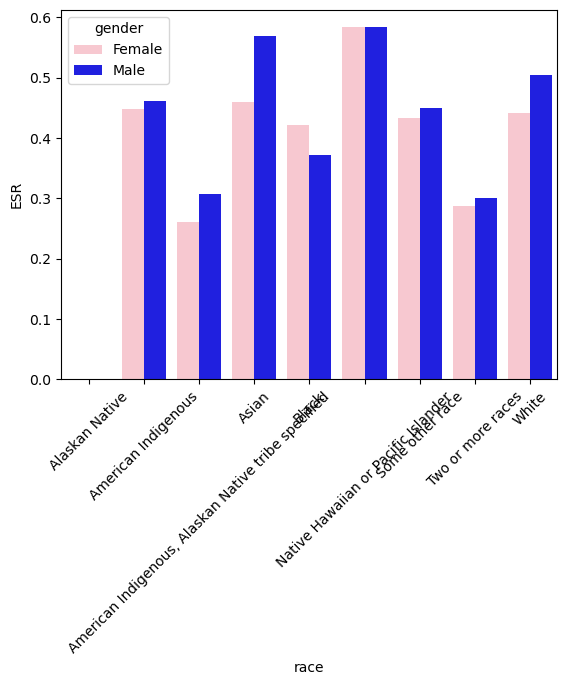

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data= employed_by_race, x="race", y="ESR", hue="gender", palette={"Male": "blue", "Female": "pink"})
plt.xticks(rotation=45);

*How many individuals are in the data?* 


-95268 Individuals are in the data 


*Of these individuals, what proportion have target label equal to 1? In employment prediction, these would correspond to employed individuals.*


-46.17% of people are employed


*Of these individuals, how many are in each of the groups?*


-We see that the largest group is white people, followed by Black people, bi-racial people, asians, other races and then indegenous people


*In each group, what proportion of individuals have target label equal to 1?*


-See chart "employed_by_race", of the categories with meaningful sample sizes (n > 100), we see that Asian people have the highest employment rate (51%), followed by white people (47%), and the lowest rates of employment by race are bi-racial people and American indegenous.


*Check for intersectional trends by studying the proportion of positive target labels broken out by your chosen group labels and an additional group label. For example, if you chose race (RAC1P) as your group, then you could also choose sex (SEX) and compute the proportion of positive labels by both race and sex. This might be a good opportunity to use a visualization such as a bar chart, e.g. via the seaborn package.*


-Looking at employment by race, we can see that on average, men are more employed than women. The only racial group where women are more employed is Black people, where 42% of women are employed and 37% of men.

## Model Audit

### Overall Audit

In [101]:
#creating a testing dataframe
df_test = pd.DataFrame(X_test, columns = features_to_use) #pulling in the testing data
y_hat = best_model.predict(X_test)
df_test["group"] = group_test #adding back in race
df_test["label"] = y_test #adding in employment status
df_test["ESR"] = y_test.astype(int)
df_test["y_hat"] = y_hat.astype(int) #adding in y_hat
df_test["race"] = df_test["group"].map(race_map) #making the race variable categorical
df_test.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,group,label,ESR,y_hat,race
0,41.0,16.0,1.0,1.0,2.0,0.0,4.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,1,True,1,1,White
1,43.0,21.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1,False,0,1,White
2,47.0,22.0,5.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1,True,1,1,White
3,78.0,16.0,2.0,0.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1,False,0,0,White
4,13.0,10.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,1,False,0,0,White


In [102]:
#Overall Accuracy
print("Accuracy: ", (y_hat == y_test).mean())

Accuracy:  0.8319338315559661


In [52]:
#Positive Predictive Value
TP = np.sum((y_hat == 1) & (y_test == 1)) 
FP = np.sum((y_hat == 1) & (y_test == 0))
TN = np.sum((y_hat == 0) & (y_test == 0))
FN = np.sum((y_hat == 0) & (y_test == 1))

PPV = TP / (TP + FP) #PPV formula
print("Positive Predictive Value: ", PPV)

Positive Predictive Value:  0.8022638223770135


In [103]:
#FPR and FNR rates
FPR = FP / (FP + TN) 
FNR = FN / (FP + TP)
print("False Positive Rate: ", FPR)
print("False Negative Rate: ", FNR)

False Positive Rate:  0.1764294592914854
False Negative Rate:  0.15080539834566825


We see that the model has an overal accuracy of 83%, and a lower positive predictive value of 80%. We also see that the false negative rate (15%) is lower than the false positive rate (17%), so the model is more likely to predict someone is employed when they aren't than prediciting someone is employed when they are.

### Subgroup accuracy

In [104]:
#Accuracy on each sub group
df_test["correct_prediction"] = (df_test["ESR"] == df_test["y_hat"]).astype(int) #sorting correct predictions as a column
subgroup_acc= df_test.groupby("race")["correct_prediction"].mean().reset_index() #sorting by race
subgroup_acc


,race,correct_prediction
0,American Indigenous,0.878788
1,"American Indigenous, Alaskan Native tribe spec...",0.866667
2,Asian,0.806100
3,Black,0.813233
4,Native Hawaiian or Pacific Islander,1.000000
5,Some other race,0.856250
6,Two or more races,0.885099
7,White,0.832698


In [ ]:
#PPV on each subgroup
warnings.simplefilter("ignore")

def compute_ppv(group):
    '''
    computes the ppv of each group
    args: group- race
    returns: the ppv by subgroup
    '''
    tp = ((group["y_hat"] == 1) & (group["ESR"] == 1)).sum()
    fp = ((group["y_hat"] == 1) & (group["ESR"] == 0)).sum()
    ppv = tp / (tp + fp)
    return pd.Series({"PPV": ppv})


subgroup_ppv = df_test.groupby("race").apply(compute_ppv).reset_index() #applying ppv function by subgroup

subgroup_ppv

,race,PPV
0,American Indigenous,0.833333
1,"American Indigenous, Alaskan Native tribe spec...",1.000000
2,Asian,0.783270
3,Black,0.741622
4,Native Hawaiian or Pacific Islander,1.000000
5,Some other race,0.775000
6,Two or more races,0.775862
7,White,0.808863


In [ ]:
#FPR and FNR by subgroup
warnings.simplefilter("ignore")
def calculate_fpr_fnr(group):
    '''
    Calcuates the false posititve and negative rates by group
    Args: group- in our case rae
    returns: the false positive and negative rates for each group
    '''
    fp = ((group["y_hat"] == 1) & (group["ESR"] == 0)).sum() #false positive calc
    fn = ((group["y_hat"] == 0) & (group["ESR"] == 1)).sum() #false negative calc
    tp = ((group["y_hat"] == 1) & (group["ESR"] == 1)).sum() #true positive calc
    tn = ((group["y_hat"] == 0) & (group["ESR"] == 0)).sum() #true negative calc

    fpr = fp / (fp + tn); #fpr rate
    fnr = fn / (fn + tp); #fnr rate

    return pd.Series({"FPR": fpr, "FNR": fnr})

subgroup_fpr_fnr = df_test.groupby("race").apply(calculate_fpr_fnr).reset_index() #applying function

subgroup_fpr_fnr

,race,FPR,FNR
0,American Indigenous,0.176471,0.062500
1,"American Indigenous, Alaskan Native tribe spec...",0.000000,0.400000
2,Asian,0.257919,0.134454
3,Black,0.185848,0.188166
4,Native Hawaiian or Pacific Islander,NaN,0.000000
5,Some other race,0.193548,0.074627
6,Two or more races,0.098237,0.156250
7,White,0.176530,0.156887


We see that the model performs decently well across different catgeories of race, especially for races with high numbers of observations. The accuracy for each subgroup is in the low to mid 80%s, which is pretty standard across races and matches the overall. The PPV is lowest for Black people (74%) and much higher for white people (80%), which is concerning, because it means white people overall are being predicted to be employed at higher rates. We also see pretty standard error rate balance across racial groups with large numbers of observations except for Asian and Indigenous people, where the rate of a false positive is much higher than the rate of a false negative.


### Bias Measures

In [ ]:
#Is your model approximately calibrated?
calibration = df_test.groupby(["y_hat", "race"])["ESR"].mean().unstack() #grouping y_hat by race and ESR to compare across races for values of y_hat
calibration

race,American Indigenous,"American Indigenous, Alaskan Native tribe specified",Asian,Black,Native Hawaiian or Pacific Islander,Some other race,Two or more races,White
y_hat,,,,,,,,
0,0.066667,0.166667,0.163265,0.131841,NaN,0.0625,0.065274,0.144431
1,0.833333,1.000000,0.783270,0.741622,1.0,0.7750,0.775862,0.808863


In [ ]:
#Does your model satisfy approximate error rate balance?
warnings.simplefilter("ignore")
error_rates_by_race = df_test.groupby("race").apply(calculate_fpr_fnr).reset_index() #using the FPR and NPR calculation from earlier
error_rates_by_race

,race,FPR,FNR
0,American Indigenous,0.176471,0.062500
1,"American Indigenous, Alaskan Native tribe spec...",0.000000,0.400000
2,Asian,0.257919,0.134454
3,Black,0.185848,0.188166
4,Native Hawaiian or Pacific Islander,NaN,0.000000
5,Some other race,0.193548,0.074627
6,Two or more races,0.098237,0.156250
7,White,0.176530,0.156887


In [134]:
#Does your model satisfy statistical parity?

sHR = 0.5 #threshold
df_test["score"] = best_model.predict_proba(X_test)[:, 1] #creating score column

def compute_high_risk_rate(group):
    '''
    Computes a group's rate of unenmployment
    args: group, in our case, race
    returns: high_risk/total, the statistical parity for each group
    '''
    high_risk = (group["score"] < sHR).sum() #a person is "high risk" if the score is higher than the threshold
    total = len(group)
    return high_risk / total #creating an average

stat_parity_by_race = df_test.groupby("race").apply(compute_high_risk_rate).reset_index()
print(stat_parity_by_race)

                                                race         0
0                                American Indigenous  0.454545
1  American Indigenous, Alaskan Native tribe spec...  0.800000
2                                              Asian  0.427015
3                                              Black  0.565462
4                Native Hawaiian or Pacific Islander  0.000000
5                                    Some other race  0.500000
6                                  Two or more races  0.687612
7                                              White  0.509482


In terms of bias measures, we see that the model is approximatley calibrated, with similar means of ESR for predicted values of ESR by race, espeically after taking out the groups that appeared very briefly in the survey data. We find that error rate parity is low for Asians, Indigenous people (higher false positives than false negatives) and bi-racial people (higher false negatives than false positives), but is pretty standard across other racial groups.The model also does a decent job of satisfying statistical parity, with a score of about .5 for races with high numbers of observations. The score however is higher for Black people and bi-racial people, and is lower for white people and Asians, meaning that they are less likely to be predicted as "high risk".

### Re-creating the plot

In [ ]:
df_test["FP"] = ((df_test["y_hat"] == 1) & (df_test["ESR"] == 0)).astype(int)
df_test["FN"] = ((df_test["y_hat"] == 0) & (df_test["ESR"] == 1)).astype(int)
df_test["TP"] = ((df_test["y_hat"] == 1) & (df_test["ESR"] == 1)).astype(int)
df_test["TN"] = ((df_test["y_hat"] == 0) & (df_test["ESR"] == 0)).astype(int)
df_test["FPR"] = df_test["FP"] / (df_test["FP"] + df_test["TN"]) #False Positive Rate
df_test["FNR"] = df_test["FN"] / (df_test["FN"] + df_test["TP"]) # False Negative Rate
fpr_fnr_by_race = df_test.groupby("race")[["FPR", "FNR"]].mean().reset_index()

posx and posy should be finite values
posx and posy should be finite values


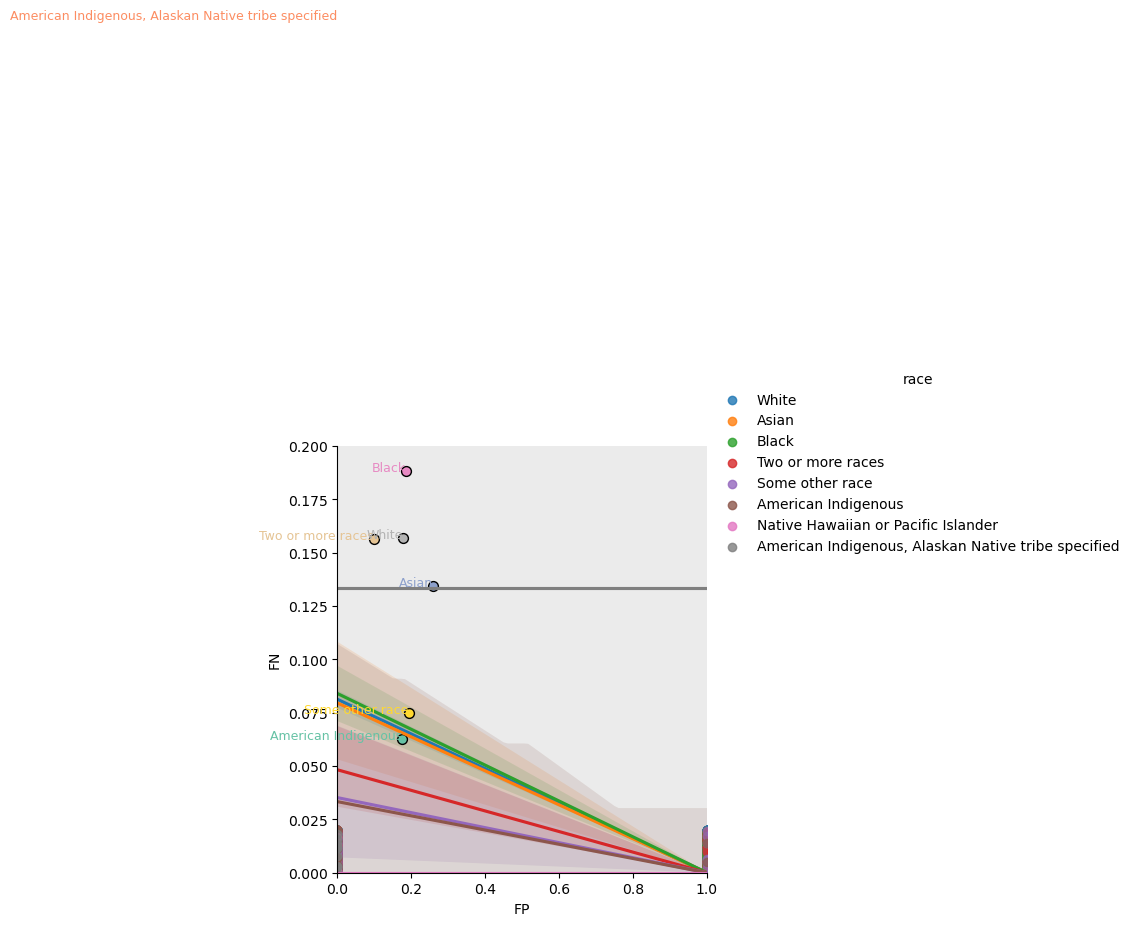

In [178]:
warnings.simplefilter("ignore")
palette = sns.color_palette("Set2", n_colors=len(fpr_fnr_by_race))

g = sns.lmplot(x="FP", y="FN", hue="race", data=df_test, # Creating an lm plot using seaborn
                y_jitter=.02, truncate=False)
g.set(xlim=(0, 1), ylim=(0, .2))

for i, row in fpr_fnr_by_race.iterrows():
    race_color = palette[i]  #Use the color corresponding to each race
    plt.scatter(x=row["FPR"], y=row["FNR"], s=50, color=race_color, marker="o", edgecolors="black") #adding in the FPR, FNR rates by race
    plt.text(row["FPR"], row["FNR"], f'{row["race"]}', fontsize=9, ha='right', color=race_color) # labeling points

# Display the plot
plt.show()

If we desired to tune our classifier threshold so that the false positive rates were equal between groups, how much would we need to change the false negative rate?
If we adjust the classifier threshold to equalize false positive (FP) rates across all groups, we would likely see false negative (FN) rates shift unevenly between groups.From the plot, groups with initially lower FP rates (such as Asian or American Indigenous) would require a lower threshold, increasing their FP rate while also increasing their FN rate. Conversely, groups with higher FP rates (such as Some Other Race or Two or More Races) would need a higher threshold, reducing their FP rate but also lowering their FN rate. In general, equalizing FP rates would widen the gap in FN rates, potentially exacerbating disparities in under-recognition for some groups.

## Discussion
Employers looking to hire people for jobs where they want little turnover would like to use this model, it would help them understand the qualities that make a perspecitve employee retain employment for longer. Large companies who hire a lot of people at once would also benefit from using algorithimic descision making to hire people. So large companies like manufacturing or mass retaliers could benefit from a speedup in their hiring processes. 
From my bias audit, the impact of deploying my model could be prepetuations of racism in society, as Black people and bi-racial people are less expected to be employed than white and Asian people. Deploying this model could lead to discriminitory practices implemented in the workplace through hiring, unless it is corrected by mediating the bias in the model through hiring caps. I feel that there is strong error rate bias which disproportionatley effects bi-racial and Black people, as they are more likely to be predicted as unemployed when they are employed than employed when they are not. 
The other thing that would make me nervous about deploying this model is that a lot of these attributes in the dataframe are out of a person's control, and are other forms of demographic information. Using a model like this to help in the hiring process may speed up hiring processes and eliminate some discrimination through removing a singluar judge (one hiring manager could have implicit biases), but it also may remove some benfits of merrit based hiring. People who are smart and well-suited for a job may not get a job because of demographic factors outside of their control.